<a href="https://colab.research.google.com/github/k4v1nd4-p3r3r4/Digital-Image-Processing-Basics/blob/main/log_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Ensure proper layout for the plots
plt.rcParams["figure.autolayout"] = True

Nagative transformation

In [ ]:
img = cv2.imread('owl.png')

In [ ]:
def nagative(r):
  s = 255 - r
  return s

Text(0, 0.5, 'Output Intencity Levels')

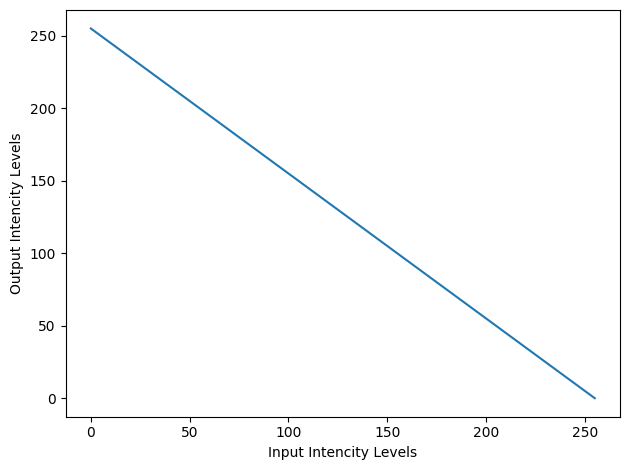

In [ ]:
x_values = np.linspace(0, 255, 256);
y_values = nagative(x_values)

plt.plot(x_values, y_values)
plt.xlabel('Input Intencity Levels') # Changed xlable to xlabel
plt.ylabel('Output Intencity Levels')

In [ ]:
img_neg = nagative(img)

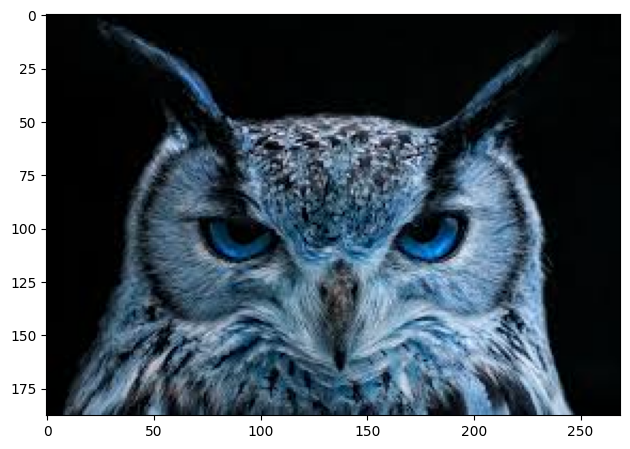

In [ ]:
plt.imshow(img)

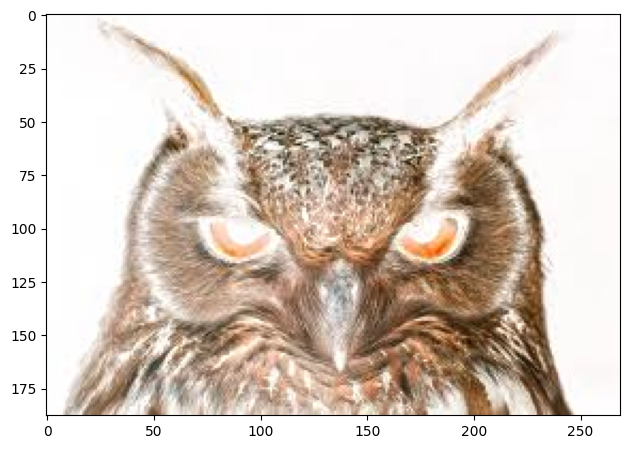

In [ ]:
plt.imshow(img_neg)

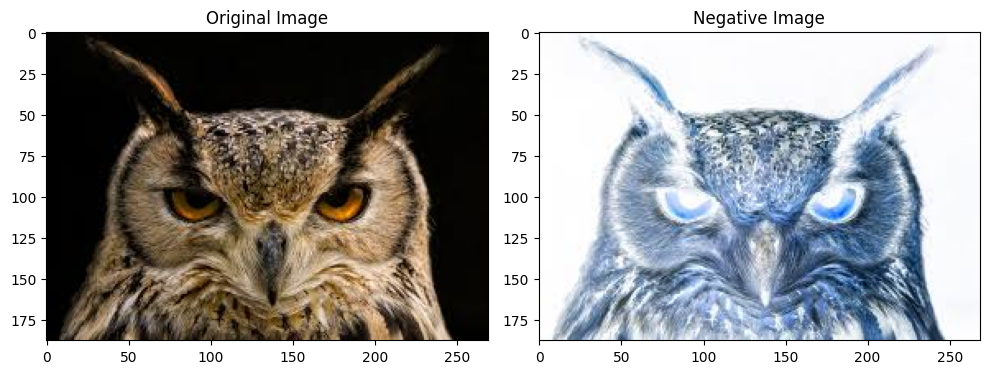

In [ ]:


plt.figure(figsize=(10, 5))  # Create a figure with specified size

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title('Original Image')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
img_neg = nagative(img)
plt.imshow(cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB))
plt.title('Negative Image')


plt.show()


Log transformation

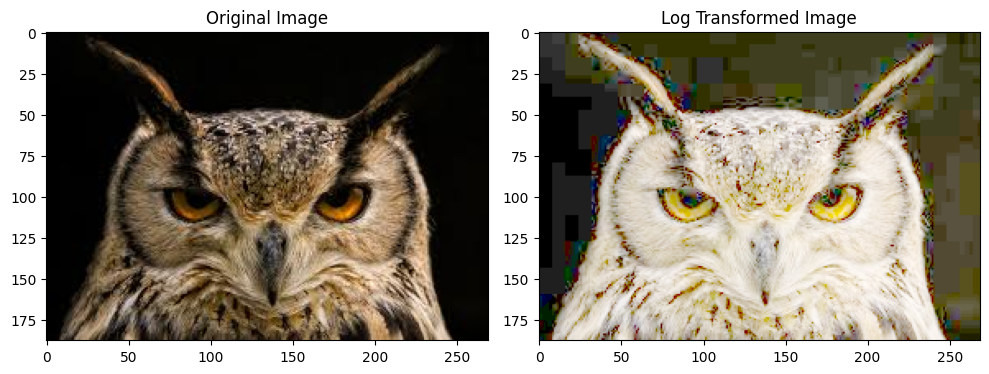

In [30]:
def logTrasform(r,c=1):
  s = c*np.log(1.0+r)
  return s

def scale_image(image):
  """Scales the pixel values of the image to the range [0, 255].

  Args:
    image: The input image.

  Returns:
    The scaled image.
  """
  # Find the minimum and maximum pixel values
  min_val = image.min()
  max_val = image.max()

  # Scale the pixel values to the range [0, 255]
  scaled_image = (image - min_val) / (max_val - min_val) * 255

  # Convert the image to 8-bit unsigned integer
  scaled_image = scaled_image.astype(np.uint8)

  return scaled_image


im = cv2.imread('owl.png')
img_log = logTrasform(im)
img_log_scale = scale_image(img_log) # Now scale_image is defined and can be called

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_log_scale, cv2.COLOR_BGR2RGB))
plt.title('Log Transformed Image')
plt.show()

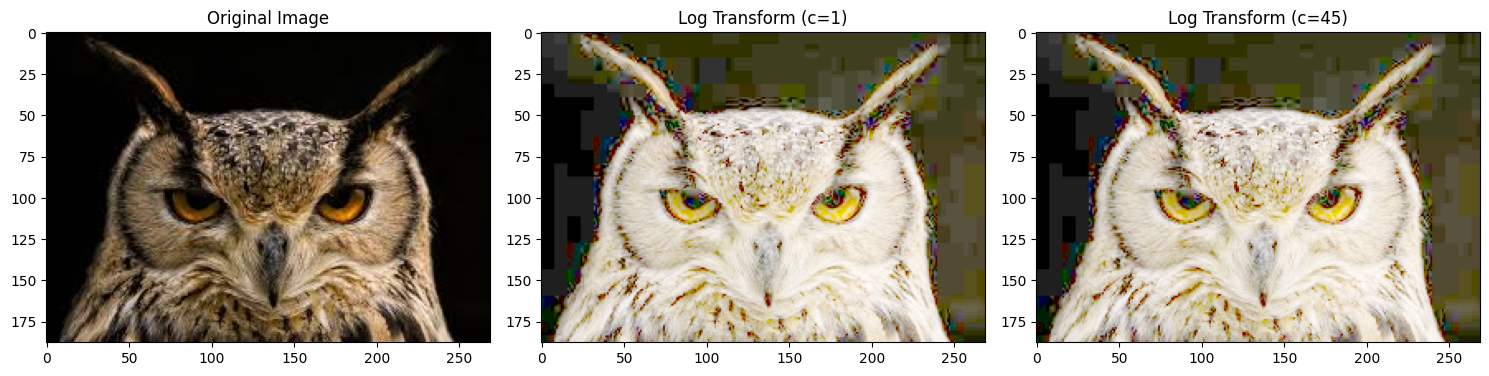

In [38]:


def logTransform(image, c=1):
    """Applies log transformation to an image."""
    image = image.astype(np.float32) + 1  # Convert to float and avoid log(0)
    log_image = c * np.log(image)
    return log_image

def scale_image(image):
    """Scales the pixel values of the image to the range [0, 255]."""
    min_val = image.min()
    max_val = image.max()
    scaled_image = (image - min_val) / (max_val - min_val) * 255
    return scaled_image.astype(np.uint8)

# Read the image
im = cv2.imread('owl.png')

# Apply log transformation with c=1 and c=45
img_log_c1 = logTransform(im, c=1)
img_log_c45 = logTransform(im, c=45)

# Scale images to the range [0,255]
img_log_c1_scaled = scale_image(img_log_c1)
img_log_c45_scaled = scale_image(img_log_c45)

# Plot original and transformed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_log_c1_scaled, cv2.COLOR_BGR2RGB))
plt.title('Log Transform (c=1)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_log_c45_scaled, cv2.COLOR_BGR2RGB))
plt.title('Log Transform (c=45)')

plt.show()


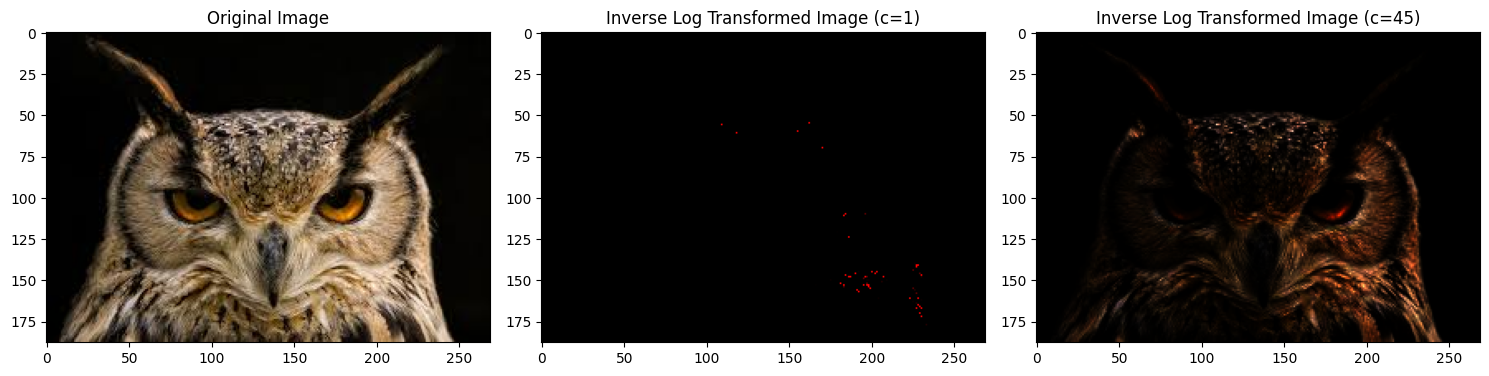

In [36]:

# Inverse log transformation
def inverseLogTransform(s, c=1):
  r = np.exp(s / c) - 1
  return r

# Example usage with c=1 and c=45
im = cv2.imread('owl.png')
img_inverse_log_1 = inverseLogTransform(im, c=1)
img_inverse_log_45 = inverseLogTransform(im, c=45)

img_inverse_log_scale_1 = scale_image(img_inverse_log_1)
img_inverse_log_scale_45 = scale_image(img_inverse_log_45)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_inverse_log_scale_1, cv2.COLOR_BGR2RGB))
plt.title('Inverse Log Transformed Image (c=1)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_inverse_log_scale_45, cv2.COLOR_BGR2RGB))
plt.title('Inverse Log Transformed Image (c=45)')

plt.show()


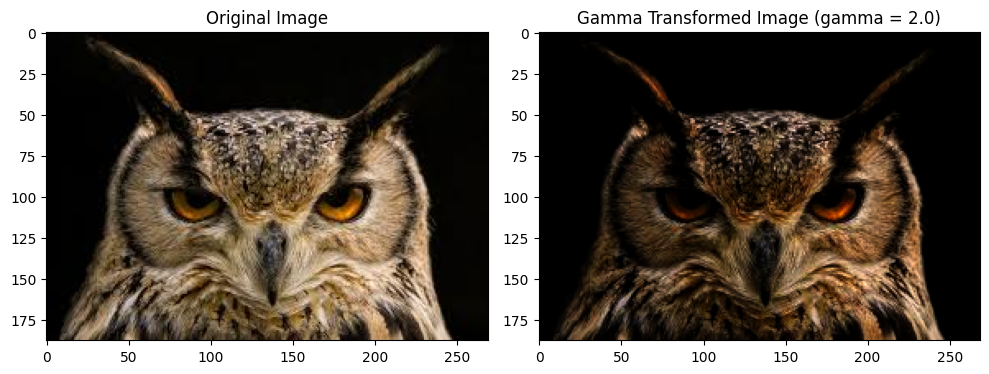

In [33]:


def gamma_transform(image, gamma=2.0):
  """Applies gamma transformation to the image.

  Args:
    image: The input image.
    gamma: The gamma value.

  Returns:
    The gamma-transformed image.
  """
  # Normalize the pixel values to the range [0, 1]
  normalized_image = image.astype(np.float32) / 255.0

  # Apply gamma transformation
  gamma_corrected_image = np.power(normalized_image, gamma)

  # Scale the pixel values back to the range [0, 255]
  gamma_corrected_image = (gamma_corrected_image * 255).astype(np.uint8)

  return gamma_corrected_image

# Load the image
im = cv2.imread('owl.png')

# Apply gamma transformation with a gamma value of 2.0
gamma_value = 2.0 # You can change this value
img_gamma = gamma_transform(im, gamma=gamma_value)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
plt.title('Gamma Transformed Image (gamma = {})'.format(gamma_value))

plt.show()


gamma transformation

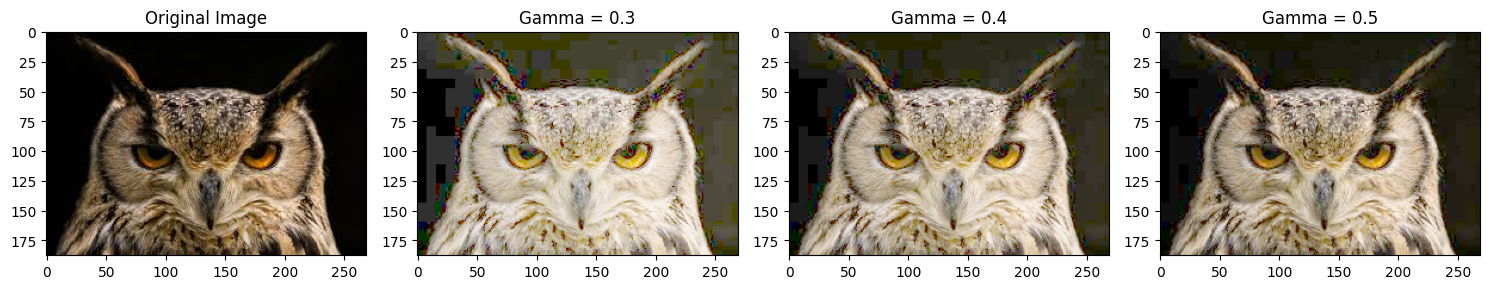

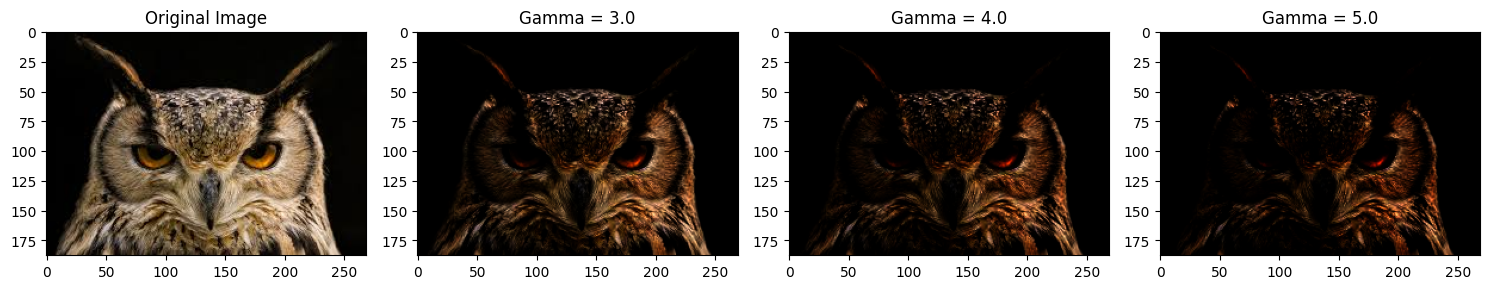

In [39]:


def gamma_transform(image, gamma, c=1):
    """Applies power-law (gamma) transformation to an image."""
    # Normalize pixel values to the range [0, 1]
    normalized_image = image.astype(np.float32) / 255.0

    # Apply gamma transformation: s = c * r^γ
    gamma_corrected_image = c * np.power(normalized_image, gamma)

    # Scale pixel values back to [0, 255]
    gamma_corrected_image = (gamma_corrected_image * 255).astype(np.uint8)

    return gamma_corrected_image

# Load the image
im = cv2.imread('owl.png')

# Define gamma values
gamma_values_low = [0.3, 0.4, 0.5]  # γ < 1 (Brightens the image)
gamma_values_high = [3.0, 4.0, 5.0] # γ > 1 (Darkens the image)

# Plot results for γ < 1
plt.figure(figsize=(15, 5))
plt.subplot(1, len(gamma_values_low) + 1, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

for i, gamma in enumerate(gamma_values_low):
    transformed_img = gamma_transform(im, gamma, c=1)
    plt.subplot(1, len(gamma_values_low) + 1, i + 2)
    plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Gamma = {gamma}')

plt.show()

# Plot results for γ > 1
plt.figure(figsize=(15, 5))
plt.subplot(1, len(gamma_values_high) + 1, 1)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

for i, gamma in enumerate(gamma_values_high):
    transformed_img = gamma_transform(im, gamma, c=1)
    plt.subplot(1, len(gamma_values_high) + 1, i + 2)
    plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Gamma = {gamma}')

plt.show()
